# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from vacay_config import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [3]:
# Configure the map plot
#%%capture --no-display

humidity_map = city_data_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    size = "Humidity",
    color = "City",
    scale = 1,
    frame_width=700, 
    frame_height=500,
)
    

# Display the map
# Screenshot added
humidity_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

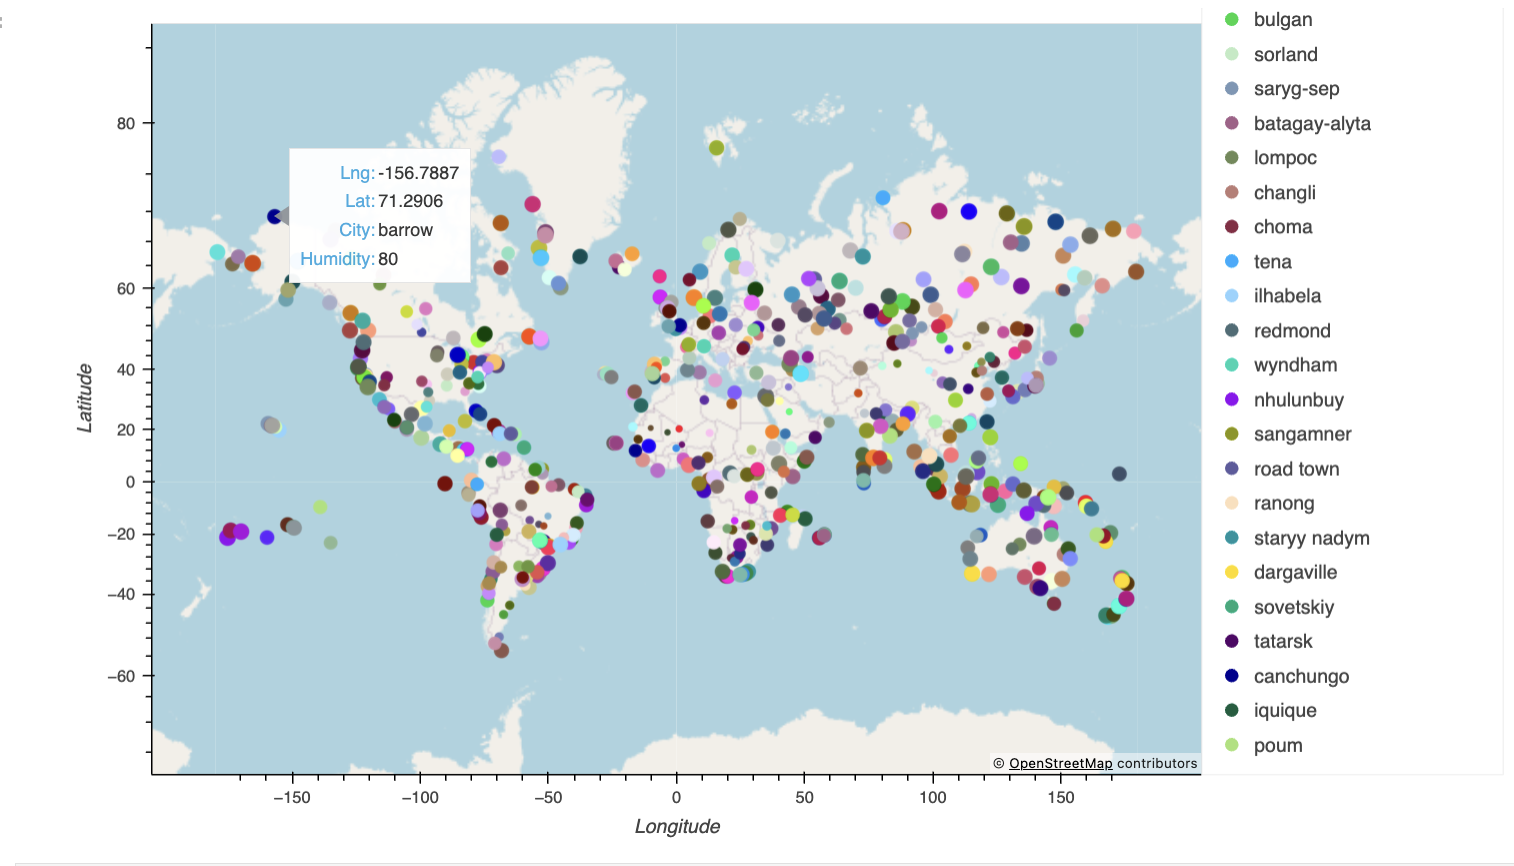


### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
#PSEUDOCODE: #cloudiness = city_data_df["Cloudiness"] == 0 
#temp = city_data_df[(city_data_df["Max Temp"] > 20) & (city_data_df["Max Temp"] < 30)]


#ideal_weather = city_data_df[(city_data_df["Wind Speed"] == wind) &
                               # (city_data_df["Cloudiness"] == cloudiness) & 
                                #(city_data_df["Max Temp"] == temp)]



#cloudiness = clean_citydata.loc[(clean_citydata["Cloudiness"])]== 5
#temp = clean_citydata[clean_citydata["Max Temp"]>20] & clean_citydata[clean_citydata["Max Temp"]<28]
#wind = clean_citydata[clean_citydata["Wind Speed"]<5]


In [5]:
# Narrow down cities that fit criteria and drop any results with null values


# Drop any rows with null values
#A max temperature lower than 27 degrees but higher than 21



ideal_weather_df = city_data_df[(city_data_df['Wind Speed'] < 3) & 
                                (city_data_df['Cloudiness'] < 5) & 
                                (city_data_df['Max Temp'] > 20) & 
                                (city_data_df['Max Temp'] < 30)]

ideal_weather_df.dropna()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
51,51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
211,211,laguna,38.4210,-121.4238,21.67,79,0,2.06,US,1666108364
240,240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378
265,265,san quintin,30.4833,-115.9500,21.20,74,0,1.37,MX,1666108394
276,276,tura,25.5198,90.2201,20.45,90,1,1.51,IN,1666108399
334,334,kailua,21.4022,-157.7394,22.47,89,1,1.18,US,1666108432
340,340,santa rosalia,27.3167,-112.2833,24.62,56,0,0.74,MX,1666108436
363,363,narwar,25.6500,77.9000,22.35,55,0,1.29,IN,1666108449


### Step 3: Create a new DataFrame called `hotel_df`.

In [6]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity

hotel_df= ideal_weather_df[["City", "Country", "Lat", "Lng", "Humidity"]].dropna()

hotel_df["Hotel Name"] = ""

hotel_df.head(20)


,City,Country,Lat,Lng,Humidity,Hotel Name
51,hilo,US,19.7297,-155.0900,83,
63,banda,IN,25.4833,80.3333,52,
81,makakilo city,US,21.3469,-158.0858,81,
211,laguna,US,38.4210,-121.4238,79,
240,tikaitnagar,IN,26.9500,81.5833,59,
265,san quintin,MX,30.4833,-115.9500,74,
276,tura,IN,25.5198,90.2201,90,
334,kailua,US,21.4022,-157.7394,89,
340,santa rosalia,MX,27.3167,-112.2833,56,
363,narwar,IN,25.6500,77.9000,55,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [7]:
# Set parameters to search for a hotel
categories = "accommodation.hotel"
radius = 10000
limit = 20

params = {
    "categories":categories,
    "limit":limit,
    "apiKey":geoapify_key 
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():

    city = row["City"]
    
    latitude = row["Lat"]
    longitude = row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"
    
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"



    
    # Convert the API response to JSON format
    name_address = requests.get(base_url, params=params)
  
    # Convert the API response to JSON format
    name_address = name_address.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
hilo - nearest hotel: Dolphin Bay Hotel
banda - nearest hotel: #acnindiafy21
makakilo city - nearest hotel: Embassy Suites by Hilton Oahu Kapolei
laguna - nearest hotel: Holiday Inn Express & Suites
tikaitnagar - nearest hotel: No hotel found
san quintin - nearest hotel: Jardines Hotel
tura - nearest hotel: Hotel Polo Orchid
kailua - nearest hotel: No hotel found
santa rosalia - nearest hotel: Sol y Mar
narwar - nearest hotel: No hotel found
roebourne - nearest hotel: No hotel found
stolac - nearest hotel: Bregava
lakki marwat - nearest hotel: No hotel found
samandag - nearest hotel: Almina Apart Hotel
san joaquin - nearest hotel: I-5 Inn
beaune - nearest hotel: Le Hameau de Barboron
tikrit - nearest hotel: فندق بلازا
guerrero negro - nearest hotel: Plaza sal paraiso
pali - nearest hotel: Hotel Pawan International


,City,Country,Lat,Lng,Humidity,Hotel Name
51,hilo,US,19.7297,-155.0900,83,Dolphin Bay Hotel
63,banda,IN,25.4833,80.3333,52,#acnindiafy21
81,makakilo city,US,21.3469,-158.0858,81,Embassy Suites by Hilton Oahu Kapolei
211,laguna,US,38.4210,-121.4238,79,Holiday Inn Express & Suites
240,tikaitnagar,IN,26.9500,81.5833,59,No hotel found
265,san quintin,MX,30.4833,-115.9500,74,Jardines Hotel
276,tura,IN,25.5198,90.2201,90,Hotel Polo Orchid
334,kailua,US,21.4022,-157.7394,89,No hotel found
340,santa rosalia,MX,27.3167,-112.2833,56,Sol y Mar
363,narwar,IN,25.6500,77.9000,55,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [8]:
%%capture --no-display

# Configure the map plot
hotel_map = hotel_df.hvplot.points(
    "Lng",
    "Lat",
    color="City",
    geo = True,
    tiles = "OSM",
    scale = 1,
    frame_width=700, 
    frame_height=500,
    hover_cols = ['Hotel Name', 'Country'],
    alpha = .75,
    size = 250,
    
)
    

# Display the map
hotel_map
#Screenshot Added


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Hotel Name,Country)

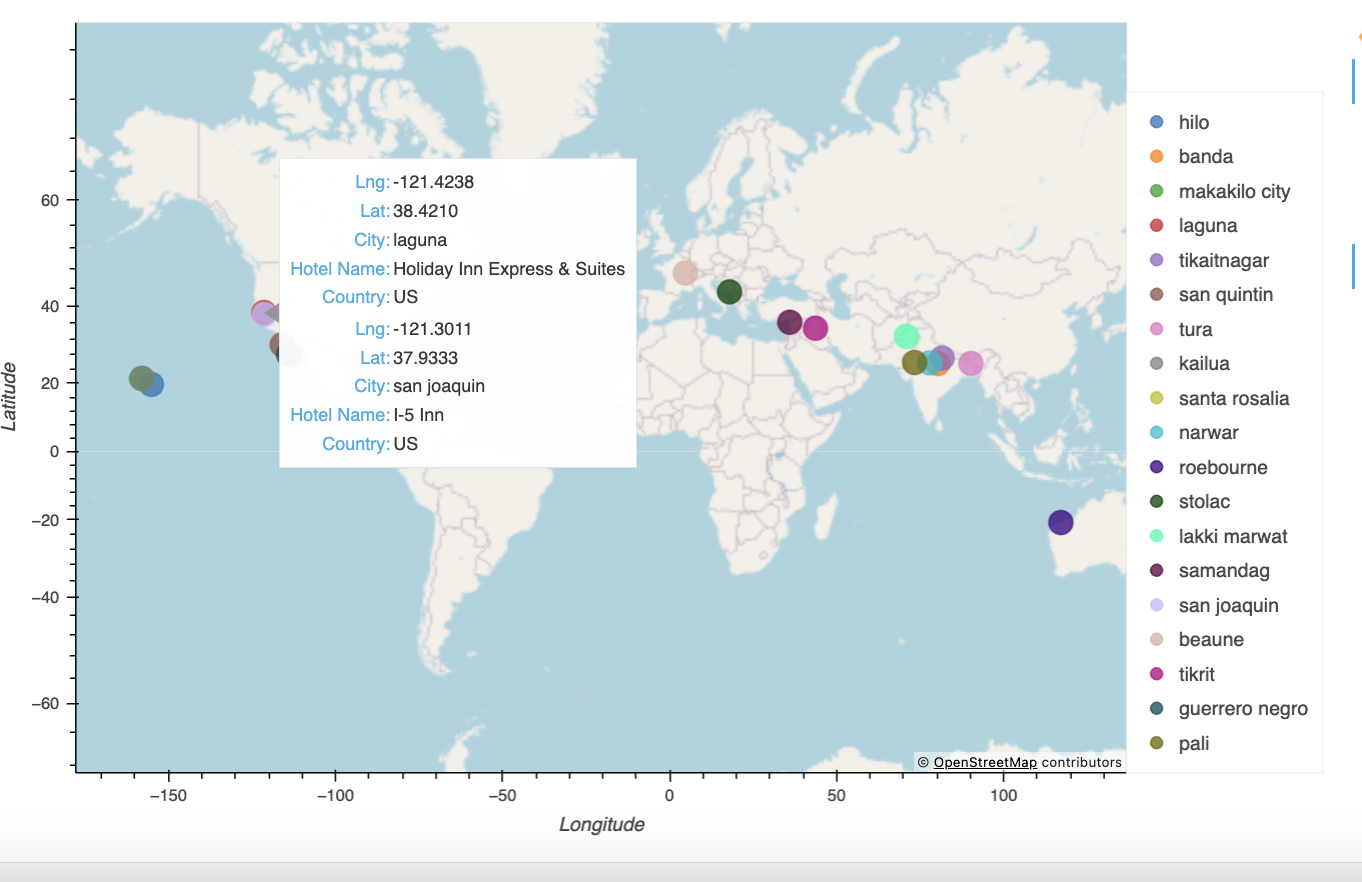